In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
# Load dataset
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
#checking for missing values, scaling issues in the dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


According to the dataframe info, we don't have null values in the dataset.

In [9]:
#checking the text columns,If they have missing or empty strings in it.
df.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


Usually .info() method would give you information on missing values. But here, it does not pick "?" as missing values as they are encoded as strings instead of an actual NaN in Python. So let's replace them with np.nan

In [15]:
df_nan = df.replace("?", np.nan)

In [17]:
#Now checking the text columns in df_nan ,If they have missing or empty strings in it.
df_nan.sort_index()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [18]:
#Generate descriptive statistics to summarize the central tendency, dispersion and shape of a dataset’s 
#distribution,excluding NaN values.
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000




*   A lot of the values in captial.gain and capital.loss are 0's. We can see that even 75% percentile of the value is 0.

*   education.num is an ordinal feature and the feature
education becomes redundant.





# **Relationships among the features**

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
alt.renderers.enable('kaggle')

RendererRegistry.enable('kaggle')

**Method 1**- Using Pearson

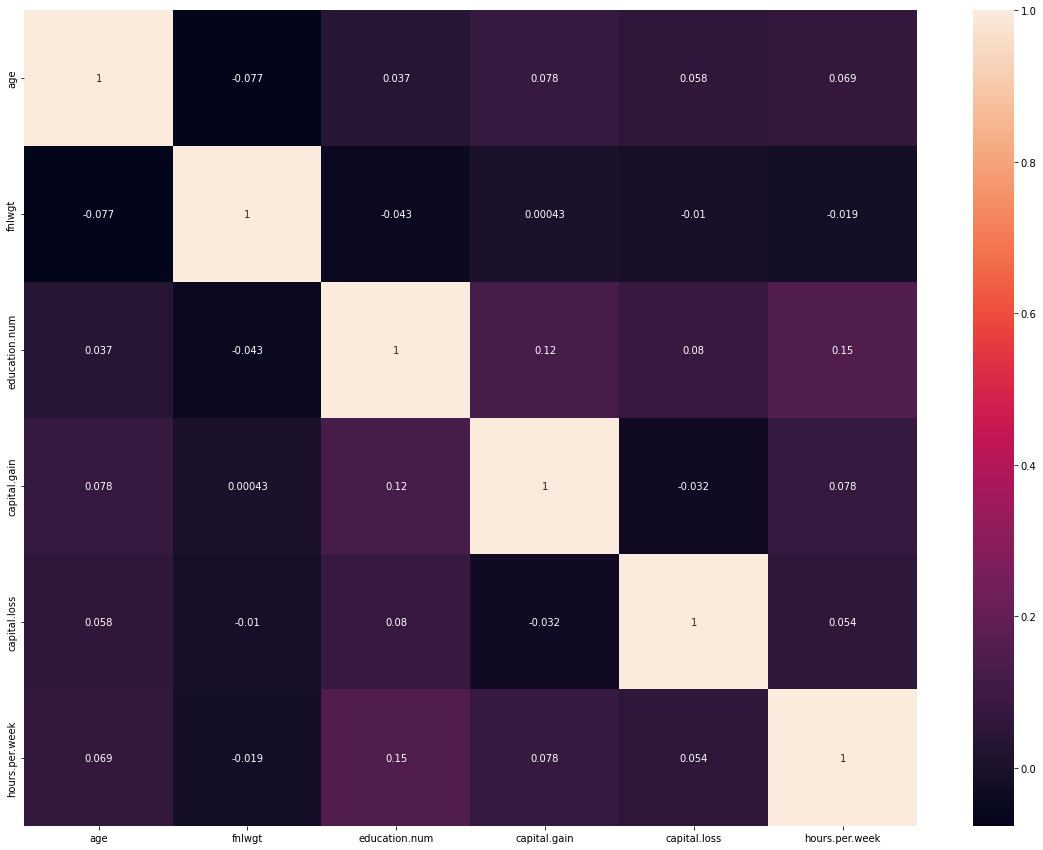

In [22]:
#Finding linear correlation using Pearson Product-moment Correlation Coefficient
sns.heatmap(df.corr(method='pearson'), annot=True)
plt.show()


*   **1** denotes Highest relationship between 2 features 

*  **0** denotes no relationship between 2 features




**Method 2**- Using Spearman

In [26]:
#Finding correlation using Spearman's correlation.

corr_df = df.corr('spearman').stack().reset_index(name='corr')
corr_df.loc[corr_df['corr'] == 1, 'corr'] = 0  # Remove diagonal
# Use abs so that we can visualize the impact of negative correaltion  
corr_df['abs'] = corr_df['corr'].abs()
corr_df.sort_values('abs', ascending=False).head(n=5)

,level_0,level_1,corr,abs
32,hours.per.week,education.num,0.167215,0.167215
17,education.num,hours.per.week,0.167215,0.167215
30,hours.per.week,age,0.142907,0.142907
5,age,hours.per.week,0.142907,0.142907
18,capital.gain,age,0.124948,0.124948


In [29]:
alt.Chart(corr_df).mark_circle().encode(
    x='level_0',
    y='level_1',
    size='abs',
    color=alt.Color('corr',
                    scale=alt.Scale(scheme='blueorange',
                                    domain=(-1, 1)))).properties(
    height=150,
    width=150)

alt.Chart(...)

-->There are very low correlation between the features.

-->But the above relations are only for numeric features.

# **Transformations** **on** **features**

--> The imputation are done on the categorical columns which have NaN values in them.

--> The numeric columns don't have NaN values. We scale the numeric columns.

--> We are doing OHE on categorical variables. For features having both imputation and OHE, first we impute the feature and then apply OHE.




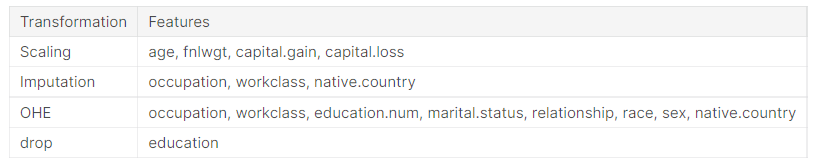

In [32]:
#preparing the list of common features 

numeric_features = ['age', 'fnlwgt', 'capital.gain', 'capital.loss', 'hours.per.week']
categorical_features = ['occupation', 'workclass', 'marital.status', 'relationship', 'native.country', 'education.num']
ordinal_features = ['education.num']
drop_features = ['education', 'race', 'sex']
passthrough_features = []
target = "income"

Below we have made the preprocessor we want to apply to our training our model. Pipeline helps us to organize our data modifications/transformations in a nicer, elegant fashion. Each step in pipeline passes its output to the next step as input.

So, for categorical_features, first the imputation is done and then we apply OHE using a pipeline.

In [35]:
preprocessor = make_column_transformer(
    (
        StandardScaler(),
        numeric_features,
    ),  # scaling on numeric features
    (
        make_pipeline(SimpleImputer(strategy="constant",
                                    fill_value="missing"),
                      OneHotEncoder(handle_unknown="ignore",
                                    sparse=False)),
        categorical_features,
    ),  # Imputation and OHE on categorical features
    (
        ("drop"),
        drop_features
    ),  # drop the drop features
)

**OHE**- One-hot encoding (OHE) creates a new binary column for each category in a categorical column.

**SimpleImputer**- Replaces NaN values to Missing using strategy constant.For imputing categorical missing data.


# **Data Splitting**

In [44]:
#spliting the data into train and test parts. Here, we'll extract 80 percent of it as test data.
train_df, test_df = train_test_split(df_nan,
                                     train_size=0.8,
                                     random_state=2018)

# Building ML Model - 
Classification using
   
    



**1.SVC(Support Vector Classifier)    
2.KNN(K Nearest Neighbour)   
3.Decision Tree**

In [46]:
results_dict = {}  # dictionary to store all the results

X_train = train_df.drop(columns=["income"])
y_train = train_df["income"]

X_test = test_df.drop(columns=["income"])
y_test = test_df["income"]

In [47]:
#Defining function which accepts model and training inputs
#It returns mean score

def mean_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean scores of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append(round(mean_scores[i], 3))

    return pd.Series(data=out_col, index=mean_scores.index)

In [48]:
# Making a dummy classifier model to compare

pipe = make_pipeline(preprocessor, DummyClassifier(strategy='prior')) 
results_dict = mean_cross_val_scores(pipe, X_train, y_train, cv=5, return_train_score=True)
pd.DataFrame(results_dict, columns=['DummyClassifier'])

,DummyClassifier
fit_time,0.114
score_time,0.038
test_score,0.759
train_score,0.759


The stratgey for DummmyClassifier is prior which predicts the class that maximizes the most frequent class and predict_proba returns the class prior.

In [49]:
models = {
    "decision tree": DecisionTreeClassifier(random_state=2018),
    "kNN": KNeighborsClassifier(),
    "RBF SVM": SVC(random_state=2018),
}

models_short = {
     "decision tree": 'DecisionTree',
    "kNN": 'kNN',
    'RBF SVM': 'SVC',
}

results_dict = {}
for i in models:
    pipe_temp = make_pipeline(preprocessor, models[i])
    results_dict[models_short[i]] = mean_cross_val_scores(
    pipe_temp, X_train, y_train, cv=5, return_train_score=True)
    
pd.DataFrame(results_dict)

,DecisionTree,kNN,SVC
fit_time,0.342,0.096,21.005
score_time,0.031,3.232,4.568
test_score,0.813,0.832,0.856
train_score,1.000,0.881,0.869


The Decision Tree overfits on the training data giving 100% accuracy on the training set. SVC has the lowest training set accuracy.

SVC gives the best validation accuracy. Due to overfitting on the training data Decision Tree has the poorest performance on the validation set.

All the above three models give better validation accuracies than the baseline model.

RBF SVC has the best validation accuracy but it is too slow! Decision Tree Classifier is the fastest one, doing most of its work during fitting the model.

In [53]:
#User input data

dat=[[29,"Private",14784,"HS-grad",9,"Divorced","Sales","Husband","White","Male",0,0,40,"United-States"]]
col=['age',	'workclass','fnlwgt','education','education.num','marital.status','occupation','relationship','race','sex','capital.gain','capital.loss','hours.per.week','native.country']
df1=pd.DataFrame(data=dat,columns=col)
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,29,Private,14784,HS-grad,9,Divorced,Sales,Husband,White,Male,0,0,40,United-States


In [57]:
#Creating SVC model to predict Salary using new data

optimal_model = make_pipeline(preprocessor, SVC(random_state=2018))
optimal_model.fit(X_train, y_train)
#print(f"Score on test set: { optimal_model.score(X_test, y_test):.3f}")

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
          

In [56]:
#Predicting salary of df1 using SVC model 
optimal_model.predict(df1)

array(['<=50K'], dtype=object)

In [59]:
#Creating Random Forest model to predict Salary using new data

from sklearn.ensemble import RandomForestClassifier

Random_model = make_pipeline(preprocessor, RandomForestClassifier(n_estimators=10, criterion = 'entropy'))
Random_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['age', 'fnlwgt',
                                                   'capital.gain',
                                                   'capital.loss',
                                                   'hours.per.week']),
                                                 ('pipeline',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
          

In [61]:
#Predicting salary of df1 using Random Forest model 
Random_model.predict(df1)

array(['<=50K'], dtype=object)

In [62]:
#Accuracy of Random Forest Classifier Model
Random_model.score(X_test,y_test)

0.8492246276677414

In [63]:
#Accuracy of SVC Classifier Model
optimal_model.score(X_test,y_test)

0.8569015814524796